<a href="https://colab.research.google.com/github/barkamoljon/data_science_praktikum/blob/main/Scikit_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('05-ml-09-scikit-simplelinearregression-amaliyot')
jovian.set_colab_id('18OQ-PHIqStBdeAYhH1smHQ_pjIgzTmy9')

     |████████████████████████████████| 68 kB 6.1 MB/s 


![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Amaliyot. Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish: 
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

###**1-Faoliyatni o`rganish**

Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (TV, Radio, Newspaper) berilgan reklamalar soni va mos keluvchi savdolar (Sales) berilgan ma`lumotlar orqali biz eng asosiy ustun qaysiligini aniqlab u yordamida prognoz qilishimiz kerak.

###**1.2 Analitik yondoshuvni aniqlash**
Bu bosqichda biz bir nechta narsalarni aniqlashtirib olamiz: 
- Model: Supervised, Unsupervised, Reinforcement?
- Algoritm: klassifikasiya, regressiya, yoki boshqa turda
- Usul: Online yoki offline

Yuqoridagi savollarga javob beramiz:
1. Supervised learning - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdadi median narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
2. Regressiya - Prognoz dedikmi demak bu regressia algoritmlari yordamida hal qilinadi
3. Offline - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q.


###**2-QADAM. MA'LUMOTLARNI O'RGANAMIZ**
###**2.1 Ma'lumotlarni ko'ramiz qilamiz**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Tozalashning,ishlov berishning hojati yo`q.

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###**Vizualizatsiya**

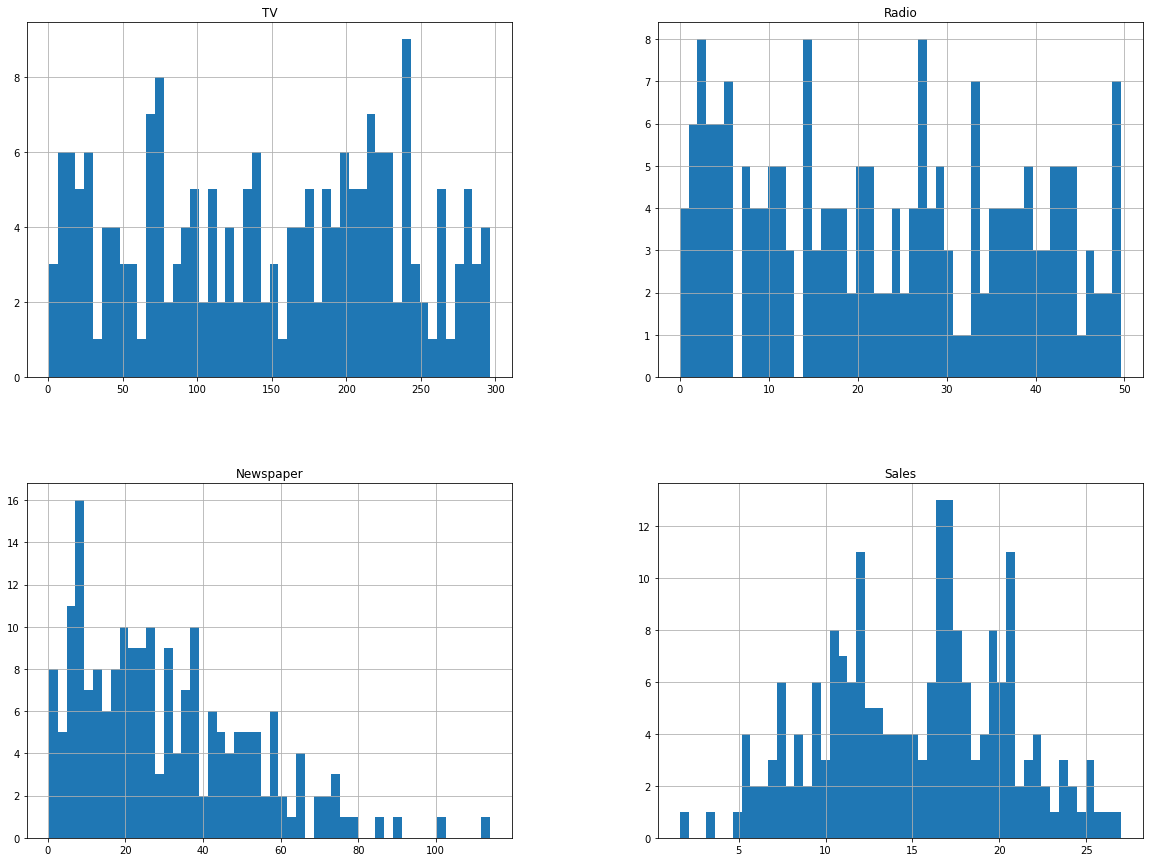

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

###**Korreksiya**

In [ ]:
df.corrwith(df['Sales']).sort_values(ascending=False)


Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

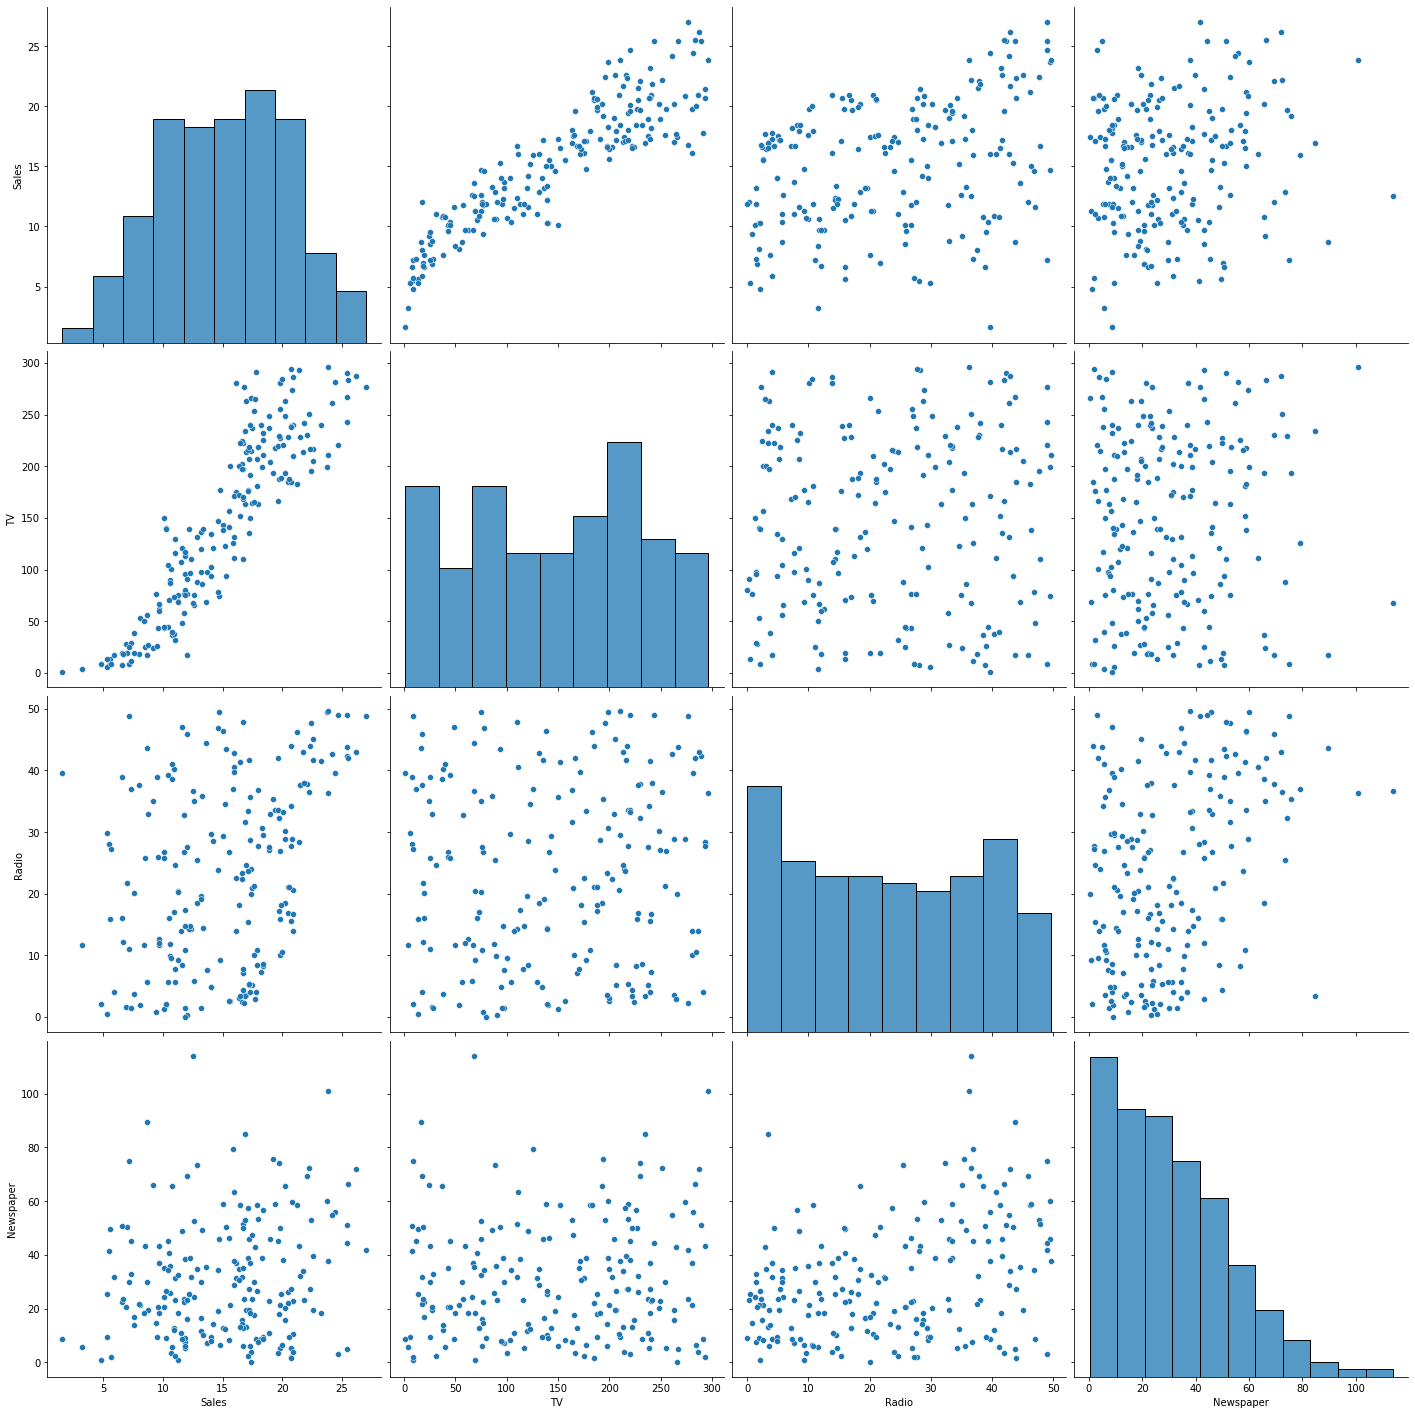

In [ ]:
cols = ['Sales' , 'TV' , 'Radio', 'Newspaper']
sns.pairplot(df[cols], height=5)
plt.show()

Korreksiyadan ma`lum bo`lgan ustun `TV` `Sales` ustunlarini munosabatini ifodalovchi grafik chizamiz 

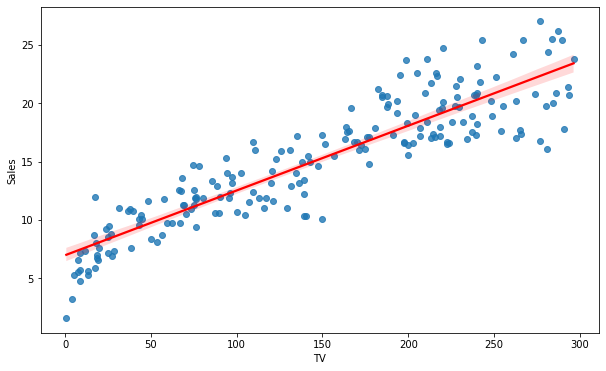

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

###**Train va Test set**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=0.1,random_state=42)

In [ ]:
#Modelni tarbiyalaymiy(train)
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

LR_model.fit(x_train, y_train)
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print('theta0:',theta0)
print('theta1:',theta1)

theta0: 7.044916461655207
theta1: 0.05513263076693964


##**Modelni baholash**

In [ ]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])


In [ ]:
y_predict = LR_model.predict(x_test)



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 2.037955356968121
RMSE: 2.5103822386472214
